In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [111]:
tesla_data = pd.read_csv("D:/AI/deplome AI/sc14/tsla.us (1).txt")
tesla_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [112]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [113]:
training_size = int(len(tesla_data)*0.80)  #1486
data_len =len(tesla_data) #1858

In [114]:
train =tesla_data[0:training_size]

In [115]:
len(train)

1486

In [116]:
test = tesla_data[training_size:data_len]

In [117]:
len(test)

372

In [118]:
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [119]:
scaler = MinMaxScaler()

In [120]:
train = train.loc[:, ['Open']].values

In [121]:
train_scaled =scaler.fit_transform(train)

In [122]:
#  rshape _data to make the data 3D so we can use into keras -->examble (4000,80,1)
end_length = len(train_scaled)

In [123]:
end_length

1486

In [124]:
x_train = []
y_train =[]
time_step = 40

for i in range(time_step,end_length):
    x_train.append(train_scaled[i - time_step:i,0])
    y_train.append(train_scaled[i,0])

In [125]:
x_train =np.array(x_train)
y_train =np.array(y_train)

In [126]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [127]:
x_train.shape

(1446, 40, 1)

In [128]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50,activation ="tanh",return_sequences =True ,input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(50,activation ="tanh",return_sequences =True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(50,activation ="tanh",return_sequences =True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(50,activation ="tanh"))
rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(1))

In [129]:
rnn_model.compile(optimizer='adam',
                loss = 'mean_squared_error')

In [130]:
rnn_model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
46/46 [==============================] - 5s 29ms/step - loss: 0.3412
Epoch 2/10
46/46 [==============================] - 1s 30ms/step - loss: 0.2088
Epoch 3/10
46/46 [==============================] - 1s 29ms/step - loss: 0.1349
Epoch 4/10
46/46 [==============================] - 1s 30ms/step - loss: 0.0895
Epoch 5/10
46/46 [==============================] - 1s 30ms/step - loss: 0.0656
Epoch 6/10
46/46 [==============================] - 1s 30ms/step - loss: 0.0548
Epoch 7/10
46/46 [==============================] - 1s 29ms/step - loss: 0.0429
Epoch 8/10
46/46 [==============================] - 1s 29ms/step - loss: 0.0384
Epoch 9/10
46/46 [==============================] - 1s 30ms/step - loss: 0.0288
Epoch 10/10
46/46 [==============================] - 1s 30ms/step - loss: 0.0303


In [131]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [132]:
test_array = test.loc[ :, ['Open']].values

In [133]:
total_dataset = pd.concat((tesla_data["Open"],test['Open']),axis=0)

In [134]:
total_dataset.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [135]:
inputs = total_dataset[len(total_dataset) - len(test) -time_step:].values.reshape(-1,1)

In [136]:
inputs = scaler.transform(inputs)

In [137]:
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [138]:
inputs.shape

(412, 1)

In [139]:
x_test = []
for i in range(time_step, 412):
    x_test.append(inputs[i-time_step:i, 0])
x_test=np.array(x_test)

In [140]:
x_test.shape

(372, 40)

In [141]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [142]:
x_test.shape

(372, 40, 1)

In [143]:
y_pred = rnn_model.predict(x_test)

12/12 [==============================] - 1s 9ms/step


In [144]:
y_pred =scaler.inverse_transform(y_pred)

In [145]:
y_pred

array([[299.0504 ],
       [298.58054],
       [286.99316],
       [273.73297],
       [256.7318 ],
       [257.89575],
       [251.54344],
       [231.73859],
       [242.78653],
       [242.9063 ],
       [227.96764],
       [235.04567],
       [251.59924],
       [261.8571 ],
       [260.5073 ],
       [271.1233 ],
       [269.70895],
       [262.16373],
       [253.841  ],
       [250.15439],
       [246.65402],
       [247.09137],
       [241.59671],
       [230.122  ],
       [226.85051],
       [212.71172],
       [214.02698],
       [219.36002],
       [235.00098],
       [234.01128],
       [233.38893],
       [234.89081],
       [231.77687],
       [245.50673],
       [249.82645],
       [252.31615],
       [251.56569],
       [250.2298 ],
       [250.17589],
       [248.683  ],
       [253.52374],
       [254.8274 ],
       [258.79944],
       [255.6454 ],
       [253.40662],
       [250.2048 ],
       [252.2808 ],
       [253.31696],
       [256.99988],
       [262.68076],


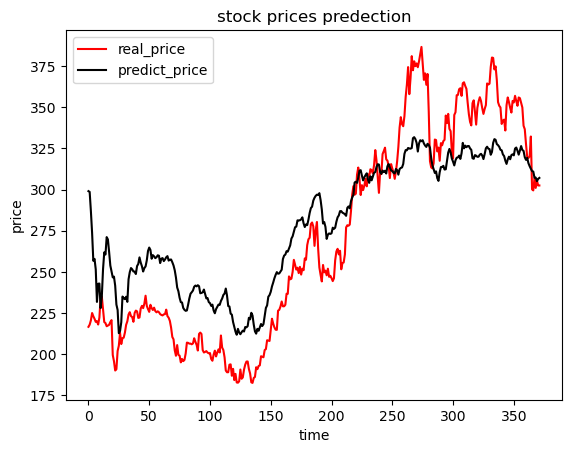

In [146]:
plt.plot(test_array,color ="red",label ="real_price")
plt.plot(y_pred,color ="black",label ="predict_price")
plt.title("stock prices predection")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [147]:
# LSTM-Model:------->
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation ="tanh",return_sequences =True ,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50,activation ="tanh",return_sequences =True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50,activation ="tanh",return_sequences =True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50,activation ="tanh"))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))

In [149]:
lstm_model.compile(optimizer='adam',
                loss = 'mean_squared_error')

In [150]:
lstm_model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
46/46 [==============================] - 10s 59ms/step - loss: 0.0341
Epoch 2/10
46/46 [==============================] - 3s 61ms/step - loss: 0.0064
Epoch 3/10
46/46 [==============================] - 3s 61ms/step - loss: 0.0053
Epoch 4/10
46/46 [==============================] - 3s 61ms/step - loss: 0.0050
Epoch 5/10
46/46 [==============================] - 3s 62ms/step - loss: 0.0050
Epoch 6/10
46/46 [==============================] - 3s 61ms/step - loss: 0.0049
Epoch 7/10
46/46 [==============================] - 3s 66ms/step - loss: 0.0050
Epoch 8/10
46/46 [==============================] - 3s 65ms/step - loss: 0.0055
Epoch 9/10
46/46 [==============================] - 3s 66ms/step - loss: 0.0046
Epoch 10/10
46/46 [==============================] - 3s 64ms/step - loss: 0.0040


In [154]:
lstm_pred =lstm_model.predict(x_test)

12/12 [==============================] - 0s 22ms/step


In [155]:
lstm_pred =scaler.inverse_transform(lstm_pred)

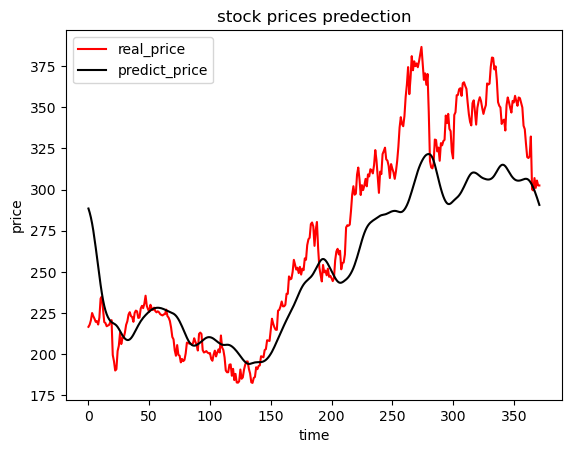

In [156]:
plt.plot(test_array,color ="red",label ="real_price")
plt.plot(lstm_pred,color ="black",label ="predict_price")
plt.title("stock prices predection")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

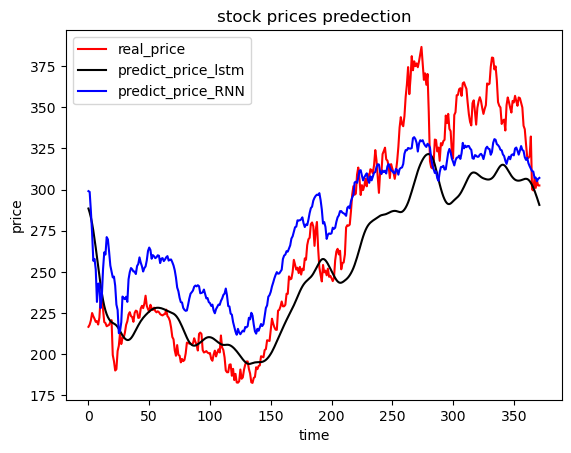

In [157]:
plt.plot(test_array,color ="red",label ="real_price")
plt.plot(lstm_pred,color ="black",label ="predict_price_lstm")
plt.plot(y_pred,color ="blue",label ="predict_price_RNN")

plt.title("stock prices predection")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()